In [112]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [113]:
(x_train,y_train), (x_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [114]:
# Normalizing pixel values to get proper weights and convergence
x_train = x_train/255
x_test = x_test/255

In [115]:
model= Sequential()
model.add(Flatten(input_shape=(28,28)))     #coverting data to 1D vector
model.add(Dense(15,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

C:\Users\vidhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [116]:
model.summary()
history = model.fit(x_train,y_train,epochs=20,validation_split=0.2)
y_probab = model.predict(x_test)      #Each node will have some value
y_pred = y_probab.argmax(axis=1)      #select max value
accuracy_score(y_test,y_pred)

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 15)             │        11,775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 12)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 10)             │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,097 (47.25 KB)

 Trainable params: 12,097 (47.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6249 - loss: 1.0456 - val_accuracy: 0.8285 - val_loss: 0.4957
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8309 - loss: 0.4873 - val_accuracy: 0.8322 - val_loss: 0.4743
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8453 - loss: 0.4442 - val_accuracy: 0.8428 - val_loss: 0.4415
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8551 - loss: 0.4131 - val_accuracy: 0.8540 - val_loss: 0.4196
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.8582 - loss: 0.3998 - val_accuracy: 0.8606 - val_loss: 0.4011
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8636 - loss: 0.3847 - val_accuracy: 0.8596 - val_loss: 0.4045
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8657 - loss: 0.3760 - val_accuracy: 0.8604 - val_loss: 0.3920
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8679 - loss: 0.3679 

0.8556

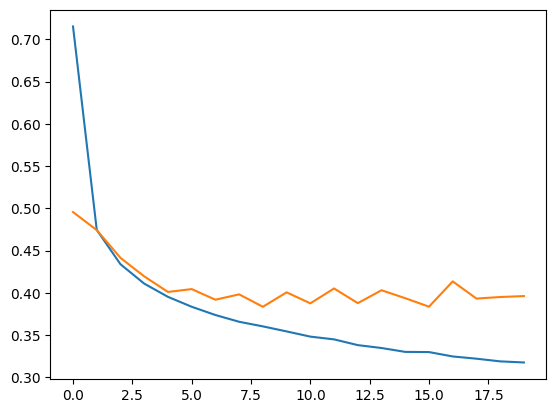

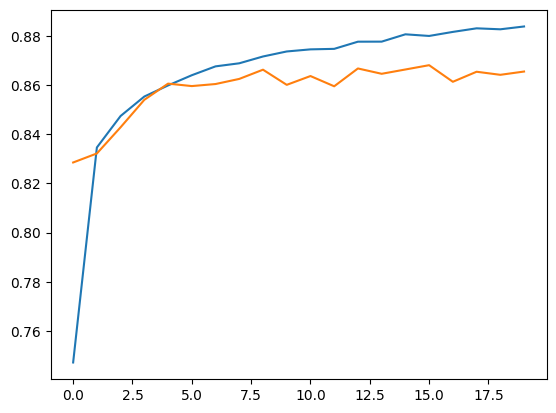

In [117]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()